In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

## Summary Ranking

In [ ]:
peg_df_s=pd.read_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/peg_v4_summaryRanking.csv')

In [ ]:
bart_df_s=pd.read_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/bart_v2_summaryRanking.csv')

In [ ]:
def extract_answer(response):
    # Find the last non-empty line
    lines = response.strip().split('\n')
    last_non_empty_line = ""
    for line in reversed(lines):
        if line.strip():
            last_non_empty_line = line.strip()
            break

    # Find the last occurrence of letter A or B
    match = re.search(r"\b([AB])\b", last_non_empty_line)

    if match:
        return match.group(1)
    else:
        return "Not found"

### Pegasus

In [ ]:
peg_df_s['Answer'] = peg_df_s['Response'].apply(extract_answer)

In [ ]:
peg_df_s.to_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/Extracted/peg_v4_summaryRanking2.csv', index=False)

In [ ]:
answer_counts = peg_df_s['Answer'].value_counts()

In [ ]:
answer_percentages = peg_df_s['Answer'].value_counts(normalize=True) * 100

In [ ]:
peg_result = pd.DataFrame({'Count': answer_counts, 'Percentage': answer_percentages})

In [ ]:
print(peg_result)

        Count  Percentage
Answer                   
A         773        77.3
B         227        22.7


A is the Plain Language Summary and B is the Generated summary. Using GPT 4o mini model as an evaluator for Factual consistency, it is found that Pegasus model only generated 22.7% of the summaries to be factually consistent over PLS when compared with the abstract.

### BART

In [ ]:
bart_df_s['Answer'] = bart_df_s['Response'].apply(extract_answer)

In [ ]:
bart_df_s.to_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/Extracted/bart_v2_summaryRanking2.csv', index=False)

In [ ]:
answer_counts = bart_df_s['Answer'].value_counts()

In [ ]:
answer_percentages = bart_df_s['Answer'].value_counts(normalize=True) * 100

In [ ]:
bart_result = pd.DataFrame({'Count': answer_counts, 'Percentage': answer_percentages})

In [ ]:
print(bart_result)

        Count  Percentage
Answer                   
B         516        51.6
A         484        48.4


A is the Plain Language Summary and B is the Generated Summary. Using GPT 4o mini model it is found that BART Model significantly over-performs than Pegasus model by generating 51.6% of the summaries as factually consistent with the abstract.

### Graph Generation

In [ ]:
labels = ['Pegasus', 'BART']
pls_scores = [peg_result.loc['A', 'Percentage'], bart_result.loc['A', 'Percentage']]
gen_sum_scores = [peg_result.loc['B', 'Percentage'], bart_result.loc['B', 'Percentage']]

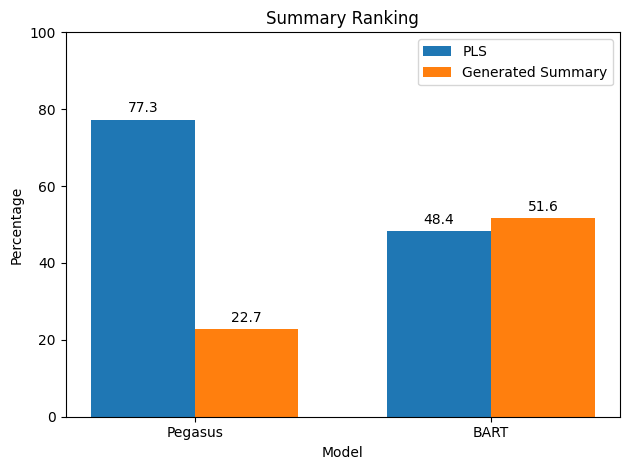

In [ ]:
#Graph to compare summary ranking performance of Pegasus and BART

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pls_scores, width, label='PLS')
rects2 = ax.bar(x + width/2, gen_sum_scores, width, label='Generated Summary')

ax.set_ylabel('Percentage')
ax.set_xlabel('Model')
ax.set_title('Summary Ranking')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0,100)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#Save the graph as an image
plt.savefig('summary_ranking.png')
plt.show()

## Consistency Rating

In [ ]:
peg_df_c=pd.read_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/peg_v4_consistencyRating2.csv')

In [ ]:
bart_df_c=pd.read_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/bart_v2_consistencyRating2.csv')

In [ ]:
def extract_first_number(response):
    # Finds the first number in the string
    match = re.search(r'\b(\d+)\b', response)
    if match:
        return int(match.group(1))
    else:
        return None

### Pegasus

In [ ]:
peg_df_c['Score'] = peg_df_c['Response'].apply(extract_first_number)

In [ ]:
peg_df_c.to_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/Extracted/peg_v4_consistencyRating2.csv', index=False)

In [ ]:
peg_df_c['Score'] = peg_df_c['Response'].apply(extract_first_number)

In [ ]:
avg_peg_score=peg_df_c['Score'].mean()

In [ ]:
print(avg_peg_score)

7.166


### BART

In [ ]:
bart_df_c['Score'] = bart_df_c['Response'].apply(extract_first_number)

In [ ]:
bart_df_c.to_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/Extracted/bart_v2_consistencyRating2.csv', index=False)

In [ ]:
bart_df_c['Score'] = bart_df_c['Response'].apply(extract_first_number)

In [ ]:
avg_bart_score=bart_df_c['Score'].mean()

In [ ]:
print(avg_bart_score)

8.317


### Store the results for further analysis

In [ ]:
data = {
    'Model': ['Pegasus', 'BART'],
    'Average Score': [avg_peg_score, avg_bart_score]
}

In [ ]:
result_df = pd.DataFrame(data)

In [ ]:
result_df.to_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/Extracted/avg_scores.csv', index=False)